In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
iris = load_iris()
data = np.c_[iris.data, iris.target]
columns = np.append(iris.feature_names, ['target'])
iris_df = pd.DataFrame(data=data, columns=columns)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


<Axes: >

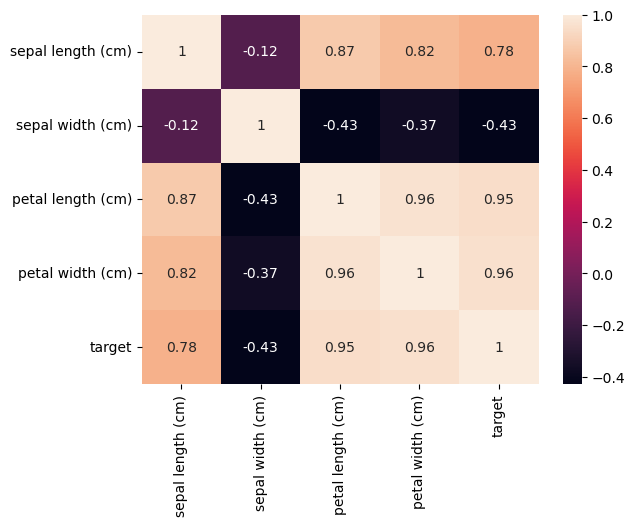

In [15]:
sns.heatmap(iris_df.corr(), annot=True )

In [16]:
X = iris.data
y = iris.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print(f'X_train: {X_train.size}')
print(f'y_train: {y_train.size}')
print(f'X_test: {X_test.size}')
print(f'y_test: {y_test.size}')

X_train: 480
y_train: 120
X_test: 120
y_test: 30


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=32)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=32)

In [38]:
y_pred = clf.predict(X_test)

<Axes: >

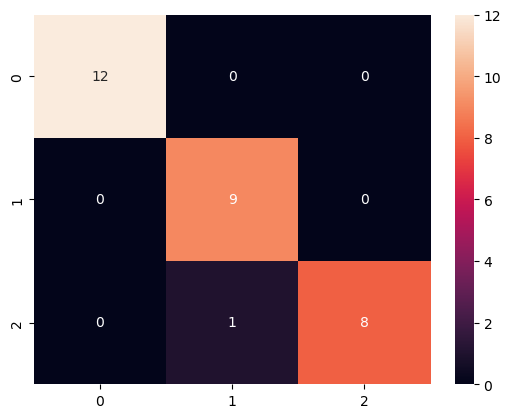

In [39]:
conf_m = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_m, annot=True)

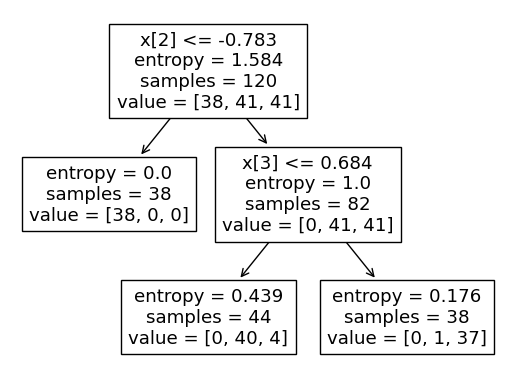

In [40]:
plot_tree(clf)
plt.show()

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

